In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import os
import time
import datetime
import pandas as pd
import numpy as np

# import daily data

In [3]:
os.listdir('./../data/daily_data/')

['daily_before_adjust_data_funds.csv',
 'daily_after_adjust_data_funds.csv',
 '.ipynb_checkpoints',
 'daily_fund_style_index_data.csv',
 'daily_no_adjust_data_funds.csv']

In [4]:
daily_data_dir = './../data/daily_data/'

# import daily funds data

In [5]:
daily_funds = pd.read_csv(os.path.join(daily_data_dir, 'daily_no_adjust_data_funds.csv'), encoding='utf-8')

In [6]:
daily_funds.shape

(322944, 17)

In [7]:
daily_funds.sort_values(["日期".decode('utf-8')], ascending=[True], inplace=True)

In [8]:
daily_funds.columns

Index([u'代码', u'简称', u'日期', u'前收盘价(元)', u'开盘价(元)', u'最高价(元)', u'最低价(元)',
       u'收盘价(元)', u'成交量(份)', u'成交金额(元)', u'涨跌(元)', u'涨跌幅(%)', u'均价(元)',
       u'换手率(%)', u'单位净值(元)', u'累计净值(元)', u'复权净值(元)'],
      dtype='object')

In [9]:
daily_funds_return = daily_funds[["日期".decode('utf-8'), "代码".decode('utf-8'), "涨跌幅(%)".decode('utf-8')]]

In [10]:
daily_funds_return.columns = ['date', 'code', 'return']

In [11]:
daily_funds_return.head()

,date,code,return
37420,2005-02-23,510050.SH,NaN
37421,2005-02-24,510050.SH,0.0000
37422,2005-02-25,510050.SH,0.4566
37423,2005-02-28,510050.SH,-0.9091
37424,2005-03-01,510050.SH,-0.5734


In [12]:
tmp = pd.to_datetime(daily_funds_return['date'])
daily_funds_return.loc[:,'year'] = tmp.dt.year
daily_funds_return.loc[:,'month'] = tmp.dt.month
daily_funds_return.loc[:,'date'] = tmp.dt.date
daily_funds_return.loc[:, 'day'] = tmp.dt.day

/home/tnbaby/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/tnbaby/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [13]:
daily_funds_return = daily_funds_return[['date', 'year', 'month', 'day', 'code', 'return']]

In [14]:
daily_funds_return.head()

,date,year,month,day,code,return
37420,2005-02-23,2005,2,23,510050.SH,NaN
37421,2005-02-24,2005,2,24,510050.SH,0.0000
37422,2005-02-25,2005,2,25,510050.SH,0.4566
37423,2005-02-28,2005,2,28,510050.SH,-0.9091
37424,2005-03-01,2005,3,1,510050.SH,-0.5734


In [15]:
daily_funds_return.columns

Index([u'date', u'year', u'month', u'day', u'code', u'return'], dtype='object')

In [16]:
daily_funds_return = daily_funds_return[~daily_funds_return['return'].isnull()]
daily_funds_return.reset_index(drop=True, inplace=True)
daily_funds_return.head()

,date,year,month,day,code,return
0,2005-02-24,2005,2,24,510050.SH,0.0000
1,2005-02-25,2005,2,25,510050.SH,0.4566
2,2005-02-28,2005,2,28,510050.SH,-0.9091
3,2005-03-01,2005,3,1,510050.SH,-0.5734
4,2005-03-02,2005,3,2,510050.SH,-0.9227


# import daily fundstyle data from daily data

In [17]:
daily_fund_style_data = pd.read_csv(os.path.join(daily_data_dir, 'daily_fund_style_index_data.csv'), encoding='utf-8')

In [18]:
daily_fund_style_data.shape

(3592, 10)

In [19]:
daily_fund_style_data.head()

,日期,中证100指数,中债综合指数,中债总指数,中证500指数,中债综合指数.1,中债中短期债券指数,中债长期债券指数,中债短融AA指数,沪深300
0,2017-10-20,3889.927,178.5158,169.1153,6647.892,178.5370,167.2458,172.9881,165.4065,3976.949
1,2017-10-19,3907.077,178.4871,169.1111,6603.004,178.5486,167.2319,173.0574,165.3832,3959.395
2,2017-10-18,3911.841,178.3602,169.0865,6612.763,178.5158,167.2136,172.9880,165.3446,3930.798
3,2017-10-17,3869.682,178.3354,169.0556,6571.424,178.4871,167.1888,172.9139,165.3035,3926.852
4,2017-10-16,3867.225,178.4674,168.9157,6501.399,178.3602,167.0750,172.5921,165.2788,3931.249


In [20]:
daily_fund_style_data.dtypes

日期            object
中证100指数      float64
中债综合指数       float64
中债总指数        float64
中证500指数      float64
中债综合指数.1     float64
中债中短期债券指数    float64
中债长期债券指数     float64
中债短融AA指数     float64
沪深300        float64
dtype: object

In [21]:
daily_fund_style_data.columns

Index([u'日期', u'中证100指数', u'中债综合指数', u'中债总指数', u'中证500指数', u'中债综合指数.1',
       u'中债中短期债券指数', u'中债长期债券指数', u'中债短融AA指数', u'沪深300'],
      dtype='object')

In [22]:
daily_fund_style_data = daily_fund_style_data[['日期'.decode('utf-8'), '中证100指数'.decode('utf-8'),
                                                '中债综合指数'.decode('utf-8'),'中债总指数'.decode('utf-8'),
                                               '中证500指数'.decode('utf-8'),'中债中短期债券指数'.decode('utf-8'),
                                               '中债长期债券指数'.decode('utf-8'), '中债短融AA指数'.decode('utf-8'),
                                              '沪深300'.decode('utf-8')]]

In [23]:
daily_fund_style_data.shape

(3592, 9)

In [24]:
daily_fund_style_data.columns = ['date', 'zhongzheng_100', 'zhongzhai_composite', 'zhongzhai_total', 
                                 'zhongzheng_500','zhongzhai_short_term','zhongzhai_long_term',
                                 'zhongzhai_short_AA', 'sh300']

In [25]:
daily_fund_style_data.head()

,date,zhongzheng_100,zhongzhai_composite,zhongzhai_total,zhongzheng_500,zhongzhai_short_term,zhongzhai_long_term,zhongzhai_short_AA,sh300
0,2017-10-20,3889.927,178.5158,169.1153,6647.892,167.2458,172.9881,165.4065,3976.949
1,2017-10-19,3907.077,178.4871,169.1111,6603.004,167.2319,173.0574,165.3832,3959.395
2,2017-10-18,3911.841,178.3602,169.0865,6612.763,167.2136,172.9880,165.3446,3930.798
3,2017-10-17,3869.682,178.3354,169.0556,6571.424,167.1888,172.9139,165.3035,3926.852
4,2017-10-16,3867.225,178.4674,168.9157,6501.399,167.0750,172.5921,165.2788,3931.249


In [26]:
daily_fund_style_data['date'] = pd.to_datetime(daily_fund_style_data['date'])
daily_fund_style_data['year'] = daily_fund_style_data['date'].dt.year
daily_fund_style_data['month'] = daily_fund_style_data['date'].dt.month
daily_fund_style_data['day'] = daily_fund_style_data['date'].dt.day
daily_fund_style_data['date'] = daily_fund_style_data['date'].dt.date

In [27]:
daily_fund_style_data = daily_fund_style_data[['date', 'year', 'month', 'day','zhongzheng_100', 'zhongzhai_composite',
                                'zhongzhai_total', 'zhongzheng_500', 'zhongzhai_short_term','zhongzhai_long_term',
                                'zhongzhai_short_AA', 'sh300']]

In [28]:
daily_fund_style_data = daily_fund_style_data[~daily_fund_style_data['zhongzheng_500'].isnull()]

In [29]:
daily_fund_style_data.sort_values(['date'], ascending=[True], inplace=True)
daily_fund_style_data.reset_index(drop=True, inplace=True)

In [30]:
daily_fund_style_data.head()

,date,year,month,day,zhongzheng_100,zhongzhai_composite,zhongzhai_total,zhongzheng_500,zhongzhai_short_term,zhongzhai_long_term,zhongzhai_short_AA,sh300
0,2007-01-09,2007,1,9,2428.57,118.8034,115.1045,1986.539,115.2119,113.8034,103.1844,2287.342
1,2007-01-10,2007,1,10,2482.90,118.7757,115.1567,2055.016,115.2738,113.7886,103.1982,2353.874
2,2007-01-11,2007,1,11,2449.00,118.7436,115.1882,2035.651,115.2981,113.8712,103.2062,2308.931
3,2007-01-12,2007,1,12,2394.84,118.7780,115.2404,2085.403,115.3529,113.9019,103.2468,2317.095
4,2007-01-15,2007,1,15,2518.63,118.7930,115.2581,2159.638,115.3657,113.9585,103.2779,2396.093


In [31]:
daily_fund_style_data_month_end = daily_fund_style_data.sort_values('day',
                                        ascending=[False]).groupby(['year','month'], as_index=False).first()

In [32]:
daily_fund_style_data_month_end.head()

,year,month,date,day,zhongzheng_100,zhongzhai_composite,zhongzhai_total,zhongzheng_500,zhongzhai_short_term,zhongzhai_long_term,zhongzhai_short_AA,sh300
0,2007,1,2007-01-31,31,2598.93,118.3049,114.1956,2198.239,114.7180,109.9300,103.4423,2316.040
1,2007,2,2007-02-28,28,2658.83,117.9083,113.7071,2516.003,114.4387,107.9980,103.6775,2520.293
2,2007,3,2007-03-30,30,2877.97,116.8937,112.6118,3133.142,113.8441,103.4275,103.9038,2945.045
3,2007,4,2007-04-30,30,3515.81,117.3977,113.4035,4109.403,114.5421,104.8780,104.2122,3702.612
4,2007,5,2007-05-31,31,3874.77,117.9826,114.0993,3736.931,115.1444,106.2162,104.4685,3677.580


# merge daily_funds_data with daily_fund style index return data

In [33]:
daily_funds_return.columns

Index([u'date', u'year', u'month', u'day', u'code', u'return'], dtype='object')

In [34]:
daily_fund_style_data.columns

Index([u'date', u'year', u'month', u'day', u'zhongzheng_100',
       u'zhongzhai_composite', u'zhongzhai_total', u'zhongzheng_500',
       u'zhongzhai_short_term', u'zhongzhai_long_term', u'zhongzhai_short_AA',
       u'sh300'],
      dtype='object')

In [35]:
#daily_funds_return = daily_funds_return[daily_funds_return['year'] >= 2006]

In [36]:
daily_fund_style_data.head()

,date,year,month,day,zhongzheng_100,zhongzhai_composite,zhongzhai_total,zhongzheng_500,zhongzhai_short_term,zhongzhai_long_term,zhongzhai_short_AA,sh300
0,2007-01-09,2007,1,9,2428.57,118.8034,115.1045,1986.539,115.2119,113.8034,103.1844,2287.342
1,2007-01-10,2007,1,10,2482.90,118.7757,115.1567,2055.016,115.2738,113.7886,103.1982,2353.874
2,2007-01-11,2007,1,11,2449.00,118.7436,115.1882,2035.651,115.2981,113.8712,103.2062,2308.931
3,2007-01-12,2007,1,12,2394.84,118.7780,115.2404,2085.403,115.3529,113.9019,103.2468,2317.095
4,2007-01-15,2007,1,15,2518.63,118.7930,115.2581,2159.638,115.3657,113.9585,103.2779,2396.093


## calculate daily returns for these fund style index

In [37]:
daily_fund_style_data_columns = list(daily_fund_style_data.columns)

In [38]:
daily_fund_style_data_columns

['date',
 'year',
 'month',
 'day',
 'zhongzheng_100',
 'zhongzhai_composite',
 'zhongzhai_total',
 'zhongzheng_500',
 'zhongzhai_short_term',
 'zhongzhai_long_term',
 'zhongzhai_short_AA',
 'sh300']

In [39]:
daily_fund_style_return_data_columns = []
for column_i in daily_fund_style_data_columns[4:]:
    daily_fund_style_data[column_i + '_shift'] = daily_fund_style_data[column_i].shift(1)
    daily_fund_style_data[column_i + '_return'] = daily_fund_style_data[column_i] / daily_fund_style_data[column_i + '_shift'] - 1
    daily_fund_style_return_data_columns.append(column_i + '_return')
daily_fund_style_data.head()

,date,year,month,day,zhongzheng_100,zhongzhai_composite,zhongzhai_total,zhongzheng_500,zhongzhai_short_term,zhongzhai_long_term,...,zhongzheng_500_shift,zhongzheng_500_return,zhongzhai_short_term_shift,zhongzhai_short_term_return,zhongzhai_long_term_shift,zhongzhai_long_term_return,zhongzhai_short_AA_shift,zhongzhai_short_AA_return,sh300_shift,sh300_return
0,2007-01-09,2007,1,9,2428.57,118.8034,115.1045,1986.539,115.2119,113.8034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-01-10,2007,1,10,2482.90,118.7757,115.1567,2055.016,115.2738,113.7886,...,1986.539,0.034471,115.2119,0.000537,113.8034,-0.000130,103.1844,0.000134,2287.342,0.029087
2,2007-01-11,2007,1,11,2449.00,118.7436,115.1882,2035.651,115.2981,113.8712,...,2055.016,-0.009423,115.2738,0.000211,113.7886,0.000726,103.1982,0.000078,2353.874,-0.019093
3,2007-01-12,2007,1,12,2394.84,118.7780,115.2404,2085.403,115.3529,113.9019,...,2035.651,0.024440,115.2981,0.000475,113.8712,0.000270,103.2062,0.000393,2308.931,0.003536
4,2007-01-15,2007,1,15,2518.63,118.7930,115.2581,2159.638,115.3657,113.9585,...,2085.403,0.035597,115.3529,0.000111,113.9019,0.000497,103.2468,0.000301,2317.095,0.034094


In [40]:
daily_fund_style_return_data_columns.insert(0, 'day')
daily_fund_style_return_data_columns.insert(0, 'month')
daily_fund_style_return_data_columns.insert(0, 'year')
daily_fund_style_return_data_columns.insert(0, 'date')

In [41]:
daily_fund_style_return_data_columns

['date',
 'year',
 'month',
 'day',
 'zhongzheng_100_return',
 'zhongzhai_composite_return',
 'zhongzhai_total_return',
 'zhongzheng_500_return',
 'zhongzhai_short_term_return',
 'zhongzhai_long_term_return',
 'zhongzhai_short_AA_return',
 'sh300_return']

In [42]:
daily_fund_style_return_data = daily_fund_style_data[daily_fund_style_return_data_columns]

In [43]:
daily_fund_style_return_data.head()

,date,year,month,day,zhongzheng_100_return,zhongzhai_composite_return,zhongzhai_total_return,zhongzheng_500_return,zhongzhai_short_term_return,zhongzhai_long_term_return,zhongzhai_short_AA_return,sh300_return
0,2007-01-09,2007,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2007-01-10,2007,1,10,0.022371,-0.000233,0.000454,0.034471,0.000537,-0.000130,0.000134,0.029087
2,2007-01-11,2007,1,11,-0.013653,-0.000270,0.000274,-0.009423,0.000211,0.000726,0.000078,-0.019093
3,2007-01-12,2007,1,12,-0.022115,0.000290,0.000453,0.024440,0.000475,0.000270,0.000393,0.003536
4,2007-01-15,2007,1,15,0.051690,0.000126,0.000154,0.035597,0.000111,0.000497,0.000301,0.034094


In [44]:
daily_fund_style_return_data = daily_fund_style_return_data[~daily_fund_style_return_data['zhongzheng_100_return'].isnull()]

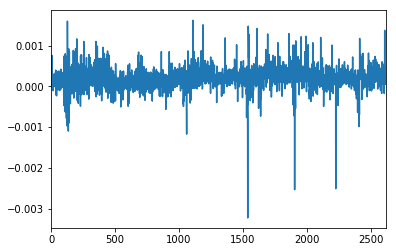

In [45]:
daily_fund_style_return_data['zhongzhai_short_AA_return'].plot()

In [46]:
daily_funds_return['return'] = daily_funds_return['return'] / 100

## find the nearest year-month-day of all funds

In [47]:
daily_data = pd.merge(daily_funds_return, daily_fund_style_return_data, how='left', on=['date','year', 'month','day'])

In [48]:
for columns_i in list(daily_data.columns):
    if columns_i in ['year','month','day']:
        continue
    print '{} : {}'.format(columns_i, daily_data[~daily_data[columns_i].isnull()].groupby(['year','month','day']).first().index.min())

daily_data = daily_data[daily_data['year'] >= 2007]    

date : (2005, 2, 24)
code : (2005, 2, 24)
return : (2005, 2, 24)
zhongzheng_100_return : (2007, 1, 10)
zhongzhai_composite_return : (2007, 1, 10)
zhongzhai_total_return : (2007, 1, 10)
zhongzheng_500_return : (2007, 1, 10)
zhongzhai_short_term_return : (2007, 1, 10)
zhongzhai_long_term_return : (2007, 1, 10)
zhongzhai_short_AA_return : (2007, 1, 10)
sh300_return : (2007, 1, 10)


In [49]:
#daily_data

# save the data into files

In [50]:
daily_data.sort_values(['code', 'year','month','day'], ascending=[True,True, True,True], inplace=True)
daily_data.reset_index(drop=True, inplace=True)
print daily_data.shape

(321919, 14)


In [51]:
daily_data.head()

,date,year,month,day,code,return,zhongzheng_100_return,zhongzhai_composite_return,zhongzhai_total_return,zhongzheng_500_return,zhongzhai_short_term_return,zhongzhai_long_term_return,zhongzhai_short_AA_return,sh300_return
0,2009-11-20,2009,11,20,150008.SZ,-0.002947,-0.004937,-0.000143,0.000506,-0.040707,0.000356,0.001082,0.000376,-0.039634
1,2009-11-23,2009,11,23,150008.SZ,-0.009852,0.006601,0.000513,0.000273,-0.026123,0.000331,0.000049,0.000098,-0.029624
2,2009-11-24,2009,11,24,150008.SZ,-0.014925,-0.027698,0.000567,0.000277,0.045071,0.000256,0.000361,0.000167,0.038184
3,2009-11-25,2009,11,25,150008.SZ,-0.010101,0.020174,0.000345,0.000302,0.027231,0.000162,0.000842,-0.000170,0.014000
4,2009-11-26,2009,11,26,150008.SZ,-0.030612,-0.041395,0.000203,0.000049,0.014606,-0.000112,0.000675,0.000137,0.010250


In [52]:
daily_data= daily_data[['code','date','year','month','day','return','sh300_return','zhongzheng_100_return','zhongzhai_composite_return',
                       'zhongzhai_total_return','zhongzheng_500_return','zhongzhai_short_term_return','zhongzhai_long_term_return', 'zhongzhai_short_AA_return']]

In [53]:
daily_data.dropna(how='any').head()

,code,date,year,month,day,return,sh300_return,zhongzheng_100_return,zhongzhai_composite_return,zhongzhai_total_return,zhongzheng_500_return,zhongzhai_short_term_return,zhongzhai_long_term_return,zhongzhai_short_AA_return
0,150008.SZ,2009-11-20,2009,11,20,-0.002947,-0.039634,-0.004937,-0.000143,0.000506,-0.040707,0.000356,0.001082,0.000376
1,150008.SZ,2009-11-23,2009,11,23,-0.009852,-0.029624,0.006601,0.000513,0.000273,-0.026123,0.000331,0.000049,0.000098
2,150008.SZ,2009-11-24,2009,11,24,-0.014925,0.038184,-0.027698,0.000567,0.000277,0.045071,0.000256,0.000361,0.000167
3,150008.SZ,2009-11-25,2009,11,25,-0.010101,0.014000,0.020174,0.000345,0.000302,0.027231,0.000162,0.000842,-0.000170
4,150008.SZ,2009-11-26,2009,11,26,-0.030612,0.010250,-0.041395,0.000203,0.000049,0.014606,-0.000112,0.000675,0.000137


In [54]:
daily_data.to_csv('./../data/daily_data/daily_data_clean_'+ datetime.date.today().strftime('%Y%m%d') + '.csv', encoding='utf-8', index=False, header=True)

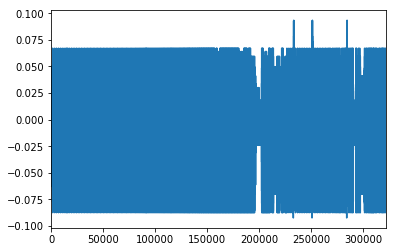

In [55]:
daily_data['sh300_return'].plot()